# Prueba Técnica: Análisis de Datos de Transporte Público en España

Dado el conjunto de datos sobre el transporte público en España, realiza un análisis exhaustivo con el objetivo de identificar áreas de mejora en la eficiencia del transporte y reducir los retrasos. El dataset incluye información sobre los viajes realizados, como la fecha, la ruta, el número de pasajeros, la duración del viaje, los retrasos, el tipo de transporte y la región.

## Objetivos
- Realizar un Análisis Exploratorio de Datos (EDA)
- Transformación de Datos
- Análisis para Mejorar la Eficiencia del Transporte
- Diseñar una Base de Datos en SQL e Insertar los Datos usando Python
- Crear un Dashboard que incluya las principales conclusiones extraídas de tu análisis. Puedes usar Tableau o Power BI.

## Requisitos
Proporcionar la solución en un Jupyter Notebook que incluya:
- Los razonamientos y decisiones tomadas durante el análisis.
- El código Python utilizado para la transformación y análisis de los datos.
- La creación e inserción de la base de datos en SQL.
- Las visualizaciones y conclusiones obtenidas.


# Análisis Exploratorio de Datos
### 1. Análisis inicial. 
Comenzaremos por la observación y carga del set de datos.  

 **1.1 Carga de librerías** que utilizaremos en el script de Python :

In [1]:
# Cargamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import plotly.express as px
import numpy as np
from sqlalchemy import create_engine, Column, Integer, String, Float, ForeignKey
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import relationship, sessionmaker

**1.2 Configuración** de la ruta del fichero y **carga de su contenido** en un DataFrame de Pandas.

In [2]:
# Configuramos la lectura de la fuente datos
RutaFichero="../data/"
Fichero="Transporte_Publico_Espana.csv"

# Cargamos el set de datos en un DataFrame de Pandas
data = pd.read_csv(RutaFichero + Fichero)

**2. Funciones para la observación.** El objetivo de crear funciones es la reutilización de código, haciéndolo más legible y más facil de mantener.<br>
**2.1 Función analisis.**  Esta es una función que llama a todas las funciones de observación del DataFrame de Pandas que nos pueden aportar 
información útil acerca del contenido, tipo de datos, dimensiones y estadísticas básicas de los datos numéricos.

In [3]:
def analisis(data):
    """
    Realiza un análisis inicial del DataFrame.
    
    Parameters:
    data (DataFrame): El DataFrame a analizar.
    
    Returns:
    None
    """
    print("Dimensiones del Dataframe:")
    mostrar_dimensiones(data)
    print("Primeras y últimas filas del DataFrame:")
    primeras_ultimas_filas(data)
    print("\nInformación del DataFrame:")
    imprimir_info(data)
    print("\nEstadísticas descriptivas:")
    # Crear y mostrar la tabla de estadísticas descriptivas
    estadisticas = crear_tabla_estadisticas(data)
    imprimir_tabla_estadisticas(estadisticas)

**2.2 Función imprimir_info.** Función que recibe como parámetro un DataFrame y muestra estadísticas descriptivas acerca de los datos <br>
que contiene éste.

In [4]:
def imprimir_info(data):
    """
    Imprime información del DataFrame.
    A través de data.info() podemos analizar que tipo de varibles hay en el data.
    Parameters:
    data (DataFrame): El DataFrame del que se va a mostrar información.
    
    Returns:
    None
    """
    display(data.info())

**2.3 Función primeras_ultimas_filas.** Función que recibe como parámetro un DataFrame y muestra sus primeras líneas y las últimas.
Esto en un análisis inicial puede ser práctico y aportar información básica que ayude al análisis.

In [5]:
def primeras_ultimas_filas(data):
    """
    Imprime las Primeras filas del DataFrame.
    
    Parameters:
    data (DataFrame): El DataFrame a mostrar.
    
    Returns:
    None
    """
    print("\n")
    print("Primeras filas")
    display(data.head())
    print("\n")
    print("Últimas filas")
    display(data.tail())
    print("\n")

**2.4 Función imprimir_tabla_estadisticas.** Función que recibe como parámetro un DataFrame y crea una tabla con algunas estadísticas descriptivas
de los valores numéricos del DataFrame (Media, Mediana, Desviación estandar... etc.)

In [6]:
def crear_tabla_estadisticas(data):
    """
    Crea una tabla con las estadísticas descriptivas del DataFrame.
    
    Parameters:
    data (DataFrame): El DataFrame a analizar.
    
    Returns:
    DataFrame: DataFrame con las estadísticas descriptivas.
    """
    # Obtener estadísticas descriptivas
    estadisticas = data.describe()
    
    # Renombrar las columnas para mayor claridad
    estadisticas.rename(index={
        'count': 'Número de Observaciones',
        'mean': 'Promedio',
        'std': 'Desviación Estándar',
        'min': 'Valor Mínimo',
        '25%': 'Primer Cuartil (25%)',
        '50%': 'Mediana (50%)',
        '75%': 'Tercer Cuartil (75%)',
        'max': 'Valor Máximo'
    }, inplace=True)
    
    return estadisticas


**2.5 Función imprimir_tabla_estadisticas.** Función que recibe como parámetro un DataFrame y crea una tabla con algunas estadísticas descriptivas
de los valores numéricos del DataFrame (Media, Mediana, Desviación estandar... etc.)

In [7]:
def imprimir_tabla_estadisticas(estadisticas):
    """
    Imprime la tabla de estadísticas descriptivas en formato de tabla.
    
    Parameters:
    estadisticas (DataFrame): DataFrame con las estadísticas descriptivas.
    
    Returns:
    None
    """
    print(tabulate(estadisticas, headers='keys', tablefmt='pretty',stralign='left'))

**2.6 Función mostrar_dimensiones.** Función que recibe como parámetro un DataFrame y muestra el número de columnas y el número de filas.

In [8]:
def mostrar_dimensiones(data):
    """
    Imprime las dimensiones DataFrame.
    
    Parameters:
    data (DataFrame): El DataFrame del que se van a mostrar las dimensiones.
    
    Returns:
    None
    """
    data_shape = data.shape
    # Crear una lista con la forma de los datos
    shape_list = [["Filas", data_shape[0]], ["Columnas", data_shape[1]]]
    # Usar tabulate para mostrar la información en formato de tabla
    print(tabulate(shape_list, headers=["Dimensión", "Número"], tablefmt="pretty"))

 # Mostrar los nombres de las columnas separados por comas
    columnas = ", ".join(data.columns)
    print("\nNombres de las columnas:")
    print(columnas)
    print("\n")

**2.7 Función valores_faltantes.** Función que recibe como parámetro un DataFrame y devuelve otro DataFrame al que se le han eliminado<br>
aquellas filas en las que en algún valor aparece "not_available" o vacío.

In [9]:
def valores_faltantes(data):
    """
    Esta función recibe un DataFrame de pandas y elimina todas las filas que 
    están vacías o cuyo contenido sea "not_available".
    
    Parámetros:
    data (pd.DataFrame): El DataFrame a limpiar.
    
    Retorna:
    pd.DataFrame: El DataFrame limpio.
    """
    # Reemplazar 'not_available' con NaN para poder eliminar las filas fácilmente
    data.replace("not_available", pd.NA, inplace=True)
    
    # Eliminar filas que contienen NaN en cualquier columna
    data_limpio = data.dropna()
    
    return data_limpio

**2.8 Ojo echar un vistazo a la función que igual sobran cosas. Función mostrar_ids_duplicados.** Función que recibe como parámetro un DataFrame y muestra diversa información acerca de la columna 'ID_Viaje' y sus posibles duplicados. También muestra si existen filas que son duplicados.

In [10]:
def mostrar_ids_duplicados(data):
    # Identificar los ID_Viaje duplicados
    duplicated_ids = data[data.duplicated(subset='ID_Viaje', keep=False)]['ID_Viaje']
    
    # Filtrar los registros que tienen estos ID_Viaje duplicados
    duplicated_records = data[data['ID_Viaje'].isin(duplicated_ids)]
    
    # Verificar si estos registros son completamente duplicados
    exact_duplicates = duplicated_records[duplicated_records.duplicated(keep=False)]
    
    # Verificar cuántos de estos registros son duplicados exactos
    count_exact_duplicates = exact_duplicates.shape[0]
    
    # Verificar cuántos registros tienen ID_Viaje duplicados
    count_total_duplicates = duplicated_records.shape[0]
    
    # Número de registros únicos con ID_Viaje duplicados
    unique_id_duplicates = duplicated_ids.nunique()
    
    print(f"El número total de registros con ID_Viaje duplicados es: {count_total_duplicates}")
    print(f"El número de registros que son completamente duplicados es: {count_exact_duplicates}")
    print(f"El número de ID_Viaje únicos duplicados es: {unique_id_duplicates}")
    
    # Si deseas ver los registros que no son exactamente duplicados
    non_exact_duplicates = duplicated_records[~duplicated_records.index.isin(exact_duplicates.index)]
    
    print("Registros con ID_Viaje duplicados que no son completamente duplicados:")
    print(non_exact_duplicates)

**3. Análisis inicial.** Utilizando la función analisis que fue descrita en el punto 2.1 hacemos una primera<br> 
observación de los datos proporcionados.


In [11]:
analisis(data)

Dimensiones del Dataframe:
+-----------+--------+
| Dimensión | Número |
+-----------+--------+
|   Filas   | 100100 |
| Columnas  |   9    |
+-----------+--------+

Nombres de las columnas:
ID_Viaje, Fecha, Ruta, Numero_Pasajeros, Duracion_Viaje_Minutos, Retraso_Minutos, Tipo_Transporte, Region, Dia_Semana


Primeras y últimas filas del DataFrame:


Primeras filas


,ID_Viaje,Fecha,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana
0,1,2023-01-01 00:00:00,Barcelona - Bilbao,NaN,not_available,999,Tranvía,Sevilla,Sunday
1,2,2023-01-01 00:01:00,Malaga - Sevilla,99.0,192.0,58,Tren,Barcelona,Sunday
2,3,2023-01-01 00:02:00,Madrid - Zaragoza,10.0,94.0,119,Autobús,Madrid,Sunday
3,4,2023-01-01 00:03:00,Sevilla - Madrid,96.0,650.0,2,Metro,Malaga,Sunday
4,5,2023-01-01 00:04:00,Madrid - Malaga,22.0,335.0,51,Autobús,Sevilla,Sunday




Últimas filas


,ID_Viaje,Fecha,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana
100095,96,2023-01-01 01:35:00,Sevilla - Madrid,85.0,631.0,30,Tren,Valencia,Sunday
100096,97,2023-01-01 01:36:00,Barcelona - Bilbao,65.0,591.0,46,Autobús,Malaga,Sunday
100097,98,2023-01-01 01:37:00,Malaga - Sevilla,65.0,228.0,7,Tranvía,Malaga,Sunday
100098,99,2023-01-01 01:38:00,Madrid - Barcelona,41.0,24.0,27,Metro,Bilbao,Sunday
100099,100,2023-01-01 01:39:00,Madrid - Barcelona,42.0,135.0,46,Tren,Barcelona,Sunday





Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100100 entries, 0 to 100099
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID_Viaje                100100 non-null  int64  
 1   Fecha                   100100 non-null  object 
 2   Ruta                    100100 non-null  object 
 3   Numero_Pasajeros        99099 non-null   float64
 4   Duracion_Viaje_Minutos  99767 non-null   object 
 5   Retraso_Minutos         100100 non-null  int64  
 6   Tipo_Transporte         100100 non-null  object 
 7   Region                  100100 non-null  object 
 8   Dia_Semana              100100 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 6.9+ MB


None


Estadísticas descriptivas:
+-------------------------+--------------------+-------------------+-------------------+
|                         | ID_Viaje           | Numero_Pasajeros  | Retraso_Minutos   |
+-------------------------+--------------------+-------------------+-------------------+
| Número de Observaciones | 100100.0           | 99099.0           | 100100.0          |
| Promedio                | 49950.5999000999   | 54.46517119244392 | 64.04468531468531 |
| Desviación Estándar     | 28896.352622265986 | 25.95646009233234 | 74.79515518493912 |
| Valor Mínimo            | 1.0                | 10.0              | 0.0               |
| Primer Cuartil (25%)    | 24925.75           | 32.0              | 29.0              |
| Mediana (50%)           | 49950.5            | 54.0              | 59.0              |
| Tercer Cuartil (75%)    | 74975.25           | 77.0              | 90.0              |
| Valor Máximo            | 100000.0           | 99.0              | 999.0        

**3.1. Análisis de cada variable de manera individual.**
Para poder entender en general cada variable analizaremos cada una de las varibles proporcionadas en el data.

De este análisis ya podemos intuir algún problema en los datos a simple vista vemos que  <span style="color:red">el Numero_pasajeros dado que el número de observaciones es menor que en las otras dos columnas, probablemente tenga Datos a nulo o vacíos. 
Lo mismo con ocurre con Duracion_Viaje_Minutos que además lo ha importado como object en lugar de int64</span>

El análisis de las estadísticas descriptivas de tu dataset proporciona información valiosa sobre las características de los datos. Vamos a desglosar estas conclusiones de manera sencilla para que sea fácil de entender para no expertos:

**3.2 Columnas Analizadas**
- **ID_Viaje**: Identificador único para cada viaje.
- **Numero_Pasajeros**: Número de pasajeros en cada viaje.
- **Duracion_Viaje_Minutos**: Duración del viaje en minutos.
- **Retraso_Minutos**: Minutos de retraso del viaje.
- **Fecha**: Fecha en la que se realiza el viaje.
- **Ruta**: Nombre de la ruta que indica el origen y el destino.
- **Tipo_Transporte**: El tipo de transporte que efectua el viaje.
- **Region**: Observando los valores no veo que se corresponda siempre al origen o al destino, incluso a zonas de paso.<br>
     Además, sus valores no se corresponden tampoco con regiones ni autonomías, son 7 ciudades o 7 provincias. Analizaremos más adelante<br>
     si esta columna es relelvante para el objetivo del análisis.
- **Dia_Semana**: El día de la semana en el que se efectúa el viaje.

**3.3 Primeras conclusiones**

1. **Número de Observaciones (count)**:
    - Hay 99,432 registros de viajes en total. <span style="color:red">Esto puede indicar que puede haber duplicados o ID's incorrectos.</span>
    - Hay 98,766 registros para el número de pasajeros, <span style="color:red">lo que indica que faltan algunos datos en esta columna.</span>

2. **Promedio (mean)**:
    - En promedio, cada viaje transporta aproximadamente 54 pasajeros.
    - La duración promedio de un viaje es de unos 367 minutos, que es aproximadamente 6 horas.
    - El retraso promedio es de aproximadamente 62 minutos.

3. **Desviación Estándar (std)**:
    - La desviación estándar para el número de pasajeros es de 26, lo que indica una variabilidad moderada alrededor del promedio.
    - La duración del viaje tiene una desviación estándar de 203 minutos, lo que muestra que dicha duración varía considerablemente.
    - El retraso tiene una desviación estándar de 64 minutos, indicando también una gran variabilidad en los retrasos.

4. **Valores Mínimos (min)**:
    - El menor número de pasajeros en un viaje es 10.
    - El viaje más corto dura 15 minutos.
    - Algunos viajes no tienen retrasos (0 minutos).

5. **Primer Cuartil (25%)**:
    - El 25% de los viajes tiene 32 o menos pasajeros.
    - El 25% de los viajes dura 191 minutos o menos (aproximadamente 3 horas y 11 minutos).
    - El 25% de los viajes tiene 29 minutos o menos de retraso.

6. **Mediana (50%)**:
    - El 50% de los viajes tiene 54 pasajeros o menos.
    - La duración mediana de los viajes es de 366 minutos (6 horas).
    - El 50% de los viajes tiene 59 minutos o menos de retraso.

7. **Tercer Cuartil (75%)**:
    - El 75% de los viajes tiene 77 pasajeros o menos.
    - El 75% de los viajes dura 543 minutos o menos (aproximadamente 9 horas).
    - El 75% de los viajes tiene 90 minutos o menos de retraso.

8. **Valores Máximos (max)**:
    - El viaje con más pasajeros tiene 99.
    - El viaje más largo dura 719 minutos (casi 12 horas).
    - El mayor retraso registrado es de 999 minutos (más de 16 horas).

**3.4 Resumen de Conclusiones**
- **Número de Pasajeros**: La mayoría de los viajes transportan entre 32 y 77 pasajeros, con un promedio de 54 pasajeros.
- **Duración del Viaje**: Los viajes pueden variar significativamente en duración, con una media de 6 horas y un rango que va desde 15 minutos hasta casi 12 horas.
- **Retrasos**: Los retrasos también son muy variables, con un promedio de poco más de una hora, aunque algunos viajes experimentan retrasos extremadamente largos.

Estas estadísticas descriptivas nos proporcionan una visión general de los datos y nos ayudan a entender mejor las características de los viajes y los problemas que podrían necesitar atención, como la variabilidad en los retrasos y la duración de los viajes. También nos ofrecen datos de las transformaciones que deberíamos llevar a cabo en la limpieza y saneamiento de los datos.

**4. Limpieza y saneamiento de datos**
Realizaremos el proceso de limpieza: 
- Valores faltantes en algunas celdas.

In [13]:
# Limpiamos todas las filas que contengan vacío o not_available
data=valores_faltantes(data)


- Columnas irrelevantes para los objetivos del análisis. Esto lo dejaremos para más adelante en el análisis cuando tengamos más información.

- Registros duplicados.

- Análisis de Outliers o valores anormales en el caso de las variables numéricas. En caso de ser preciso.

- Posibles Errores tipográficos en los valores de las variables categóricas.

- Cambio del tipo del valor, en el caso de fechas que vengan como texto y situaciones similares.

In [14]:
# Convertimos la columna Duracion_Viaje_Minutos a float64
data['Duracion_Viaje_Minutos'] = data['Duracion_Viaje_Minutos'].astype('float64')

In [16]:
# Convertir la columna 'Fecha' a datetime
data['Fecha'] = pd.to_datetime(data['Fecha'])

In [17]:
print("ID's duplicados antes de eliminación")
mostrar_ids_duplicados(data)

# Eliminar duplicados basados en la columna 'ID_Viaje', manteniendo el primer registro
# con el parámetro inplace = True de Pandas que nos permite realizar los cambios en el mismo dataframe 
# al que estamos haciendo referencia.
data.drop_duplicates(subset='ID_Viaje', keep='first',inplace=True)

print("ID's duplicados después de eliminación")
mostrar_ids_duplicados(data)

ID's duplicados antes de eliminación
El número total de registros con ID_Viaje duplicados es: 198
El número de registros que son completamente duplicados es: 198
El número de ID_Viaje únicos duplicados es: 99
Registros con ID_Viaje duplicados que no son completamente duplicados:
Empty DataFrame
Columns: [ID_Viaje, Fecha, Ruta, Numero_Pasajeros, Duracion_Viaje_Minutos, Retraso_Minutos, Tipo_Transporte, Region, Dia_Semana]
Index: []
ID's duplicados después de eliminación
El número total de registros con ID_Viaje duplicados es: 0
El número de registros que son completamente duplicados es: 0
El número de ID_Viaje únicos duplicados es: 0
Registros con ID_Viaje duplicados que no son completamente duplicados:
Empty DataFrame
Columns: [ID_Viaje, Fecha, Ruta, Numero_Pasajeros, Duracion_Viaje_Minutos, Retraso_Minutos, Tipo_Transporte, Region, Dia_Semana]
Index: []


In [18]:
print("Volvemos a realizar un análisis tras la limpieza")
analisis(data)

Volvemos a realizar un análisis tras la limpieza
Dimensiones del Dataframe:
+-----------+--------+
| Dimensión | Número |
+-----------+--------+
|   Filas   | 98667  |
| Columnas  |   9    |
+-----------+--------+

Nombres de las columnas:
ID_Viaje, Fecha, Ruta, Numero_Pasajeros, Duracion_Viaje_Minutos, Retraso_Minutos, Tipo_Transporte, Region, Dia_Semana


Primeras y últimas filas del DataFrame:


Primeras filas


,ID_Viaje,Fecha,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana
1,2,2023-01-01 00:01:00,Malaga - Sevilla,99.0,192.0,58,Tren,Barcelona,Sunday
2,3,2023-01-01 00:02:00,Madrid - Zaragoza,10.0,94.0,119,Autobús,Madrid,Sunday
3,4,2023-01-01 00:03:00,Sevilla - Madrid,96.0,650.0,2,Metro,Malaga,Sunday
4,5,2023-01-01 00:04:00,Madrid - Malaga,22.0,335.0,51,Autobús,Sevilla,Sunday
5,6,2023-01-01 00:05:00,Madrid - Zaragoza,41.0,584.0,68,Metro,Barcelona,Sunday




Últimas filas


,ID_Viaje,Fecha,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana
99995,99996,2023-03-11 10:35:00,Malaga - Sevilla,89.0,566.0,38,Autobús,Valencia,Saturday
99996,99997,2023-03-11 10:36:00,Madrid - Zaragoza,26.0,621.0,106,Metro,Zaragoza,Saturday
99997,99998,2023-03-11 10:37:00,Valencia - Sevilla,95.0,174.0,54,Tren,Valencia,Saturday
99998,99999,2023-03-11 10:38:00,Madrid - Zaragoza,83.0,248.0,96,Tranvía,Madrid,Saturday
99999,100000,2023-03-11 10:39:00,Malaga - Sevilla,72.0,478.0,94,Metro,Sevilla,Saturday





Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 98667 entries, 1 to 99999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_Viaje                98667 non-null  int64         
 1   Fecha                   98667 non-null  datetime64[ns]
 2   Ruta                    98667 non-null  object        
 3   Numero_Pasajeros        98667 non-null  float64       
 4   Duracion_Viaje_Minutos  98667 non-null  float64       
 5   Retraso_Minutos         98667 non-null  int64         
 6   Tipo_Transporte         98667 non-null  object        
 7   Region                  98667 non-null  object        
 8   Dia_Semana              98667 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 7.5+ MB


None


Estadísticas descriptivas:
+-------------------------+--------------------+-------------------------------+--------------------+------------------------+--------------------+
|                         | ID_Viaje           | Fecha                         | Numero_Pasajeros   | Duracion_Viaje_Minutos | Retraso_Minutos    |
+-------------------------+--------------------+-------------------------------+--------------------+------------------------+--------------------+
| Número de Observaciones | 98667.0            | 98667                         | 98667.0            | 98667.0                | 98667.0            |
| Promedio                | 50001.168749429904 | 2023-02-04 17:20:10.124965632 | 54.460559254867384 | 366.884247012679       | 59.32894483464583  |
| Valor Mínimo            | 2.0                | 2023-01-01 00:01:00           | 10.0               | 15.0                   | 0.0                |
| Primer Cuartil (25%)    | 25001.0            | 2023-01-18 08:40:00           | 32.

#### Análisis de variables categóricas


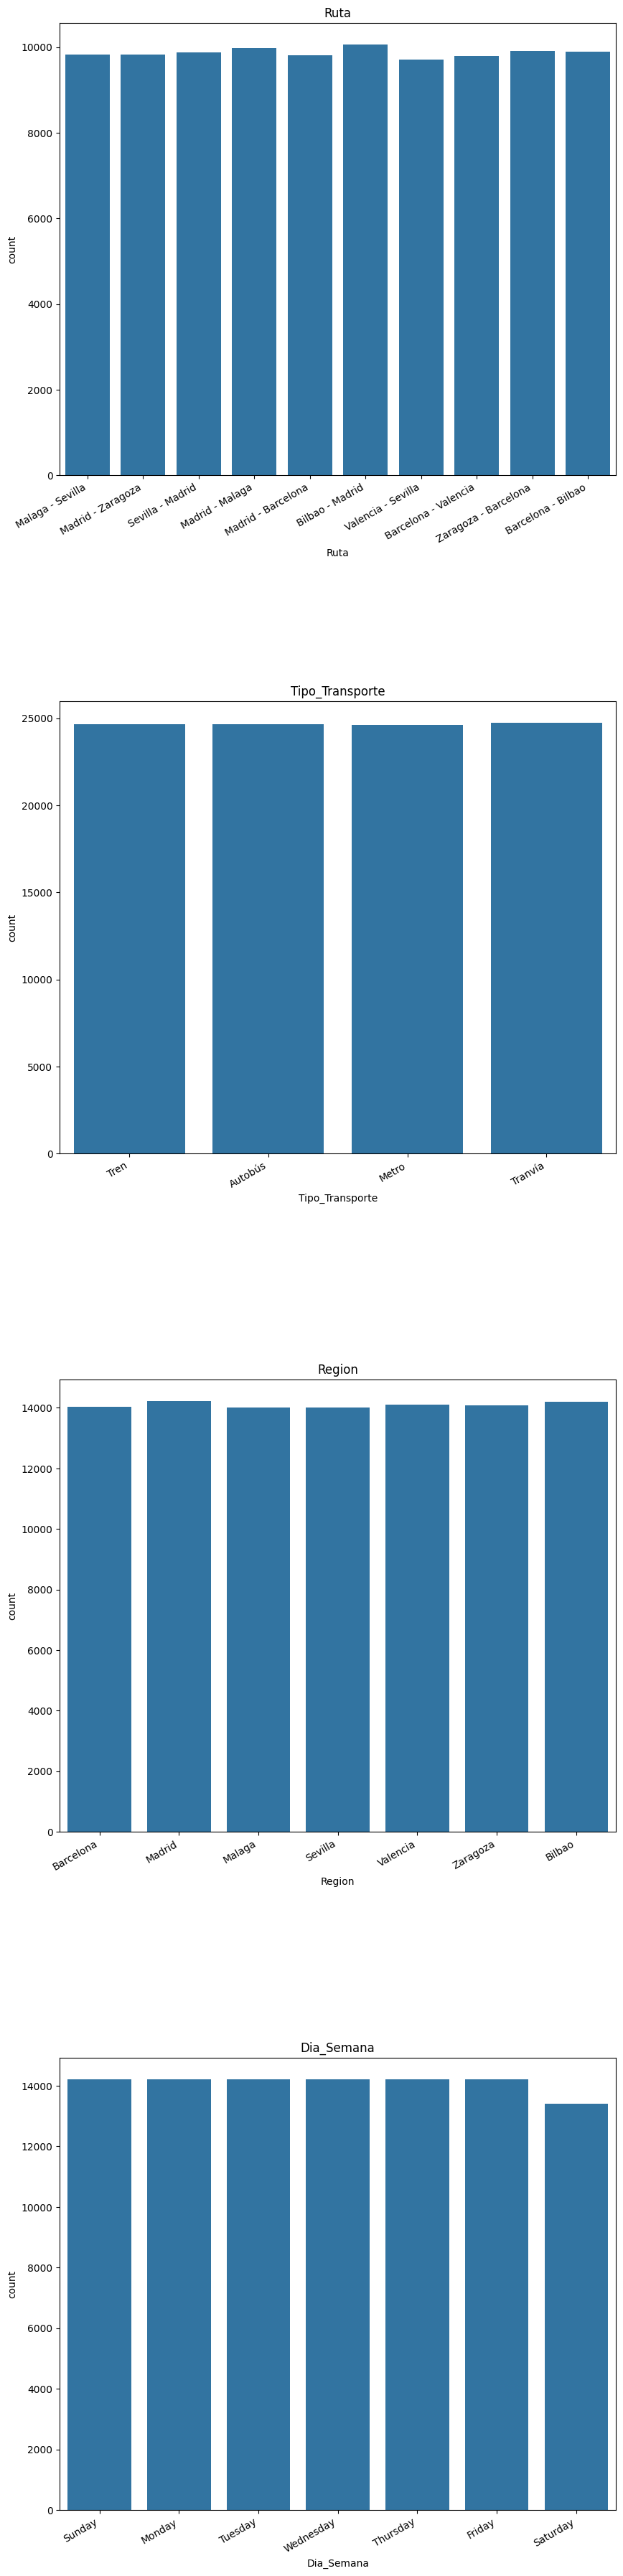

In [19]:
# Tomemos las variables categóricas y generemos gráficos de barras
col_cat = ['Ruta', 'Tipo_Transporte', 'Region', 'Dia_Semana']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10, 45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)
    for label in ax[i].get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')  # Alinear etiquetas horizontalmente a la derecha

plt.show()

In [22]:
# Establecer estilo
sns.set_style("whitegrid")
sns.set_palette("pastel")

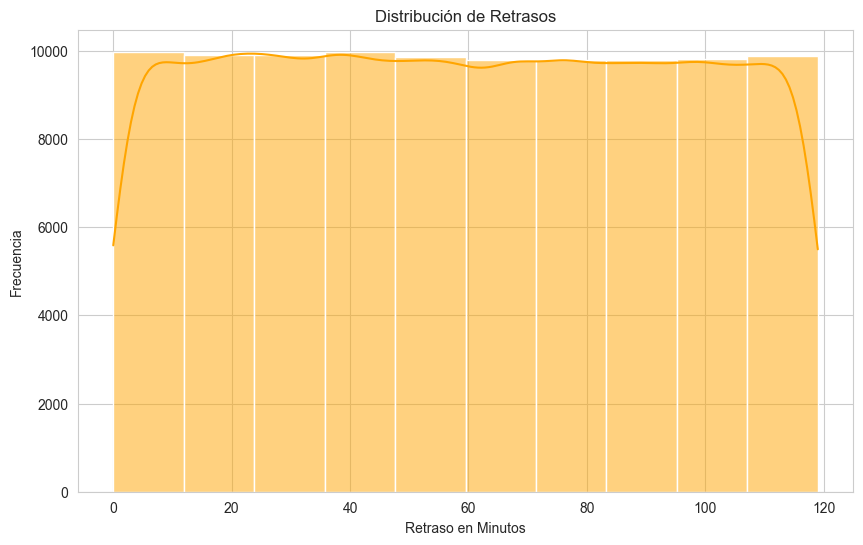

In [30]:
# Distribución de Retrasos
plt.figure(figsize=(10, 6))
sns.histplot(data['Retraso_Minutos'], bins=10, kde=True, color="orange")
plt.title('Distribución de Retrasos')
plt.xlabel('Retraso en Minutos')
plt.ylabel('Frecuencia')
plt.show()

**4.1 Conclusiones de la Gráfica de Distribución de Retrasos**  
**Retrasos Constantes:**

- La distribución de los retrasos muestra una frecuencia constante en la mayoría de los intervalos de retraso. Esto sugiere que los retrasos están distribuidos de manera uniforme entre diferentes duraciones, sin un claro pico o tendencia.
Frecuencia de Retrasos:

- La frecuencia de los retrasos es alta en casi todos los intervalos, indicando que los retrasos son un problema recurrente y frecuente en el sistema de transporte público.
Extremos:

- Los extremos de la gráfica muestran una caída abrupta, lo que podría indicar una menor ocurrencia de retrasos extremadamente cortos o extremadamente largos, exceptuando algunos outliers significativos.

- La uniformidad en la distribución sugiere que los retrasos no están vinculados a eventos específicos o condiciones aisladas. Es probable que haya problemas sistémicos que afectan la puntualidad de manera constante.

Esta gráfica proporciona una visión general útil del problema de los retrasos, pero para acciones más específicas, se necesitaría combinar esta información con otros análisis detallados, como los que hemos discutido anteriormente (por tipo de transporte, región, etc.).

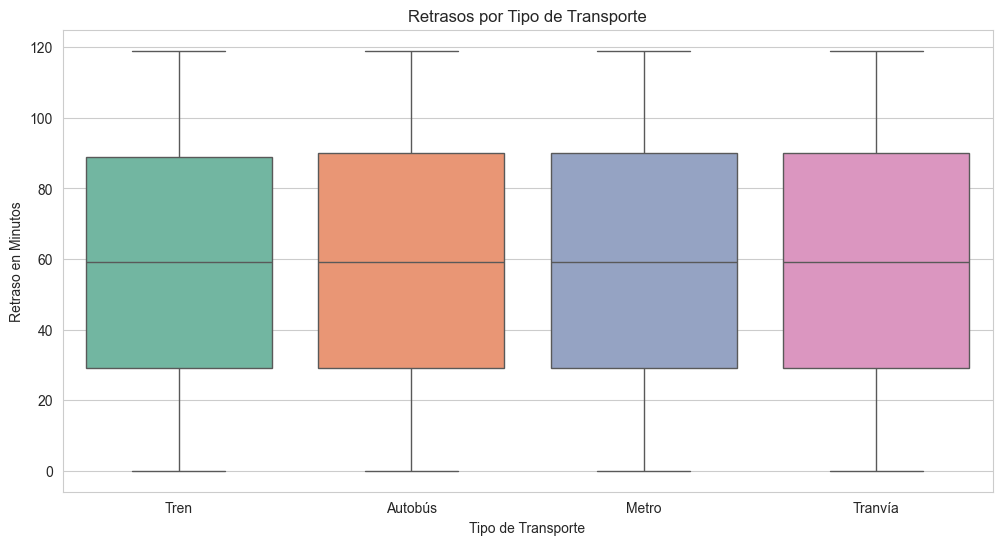

In [28]:
# Retrasos por Tipo de Transporte
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tipo_Transporte', y='Retraso_Minutos', data=data, hue='Tipo_Transporte', palette="Set2", dodge=False)
plt.title('Retrasos por Tipo de Transporte')
plt.xlabel('Tipo de Transporte')
plt.ylabel('Retraso en Minutos')
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.show()

**4.2 Conclusiones de la Gráfica de Retrasos por Medio de transporte**  
**Medianas Similares:**

- Las medianas de retraso para los cuatro tipos de transporte (Tren, Autobús, Metro y Tranvía) son muy similares, alrededor de los 60 minutos. Esto indica que, en general, todos los tipos de transporte tienen una tendencia central similar en cuanto a los retrasos.
Rango Intercuartílico (IQR):

- El rango intercuartílico (IQR) es similar para todos los tipos de transporte, lo que indica que la dispersión de los retrasos también es comparable. Esto sugiere que no hay un tipo de transporte que se destaque significativamente en términos de variabilidad de retraso.
Extremos:

- Todos los tipos de transporte tienen valores mínimos de retraso cercanos a 0 minutos y valores máximos alrededor de 120 minutos. Esto muestra que los retrasos extremos afectan de manera uniforme a todos los tipos de transporte.
Comparación de Tipos de Transporte:

- No hay un tipo de transporte que se destaque claramente como el peor o el mejor en términos de retrasos. La similitud en las distribuciones sugiere que los problemas de retraso son sistémicos y no específicos de un solo tipo de transporte

Esta gráfica refuerza la necesidad de una intervención amplia y coordinada para abordar los retrasos en el sistema de transporte público, en lugar de soluciones aisladas para tipos específicos de transporte.

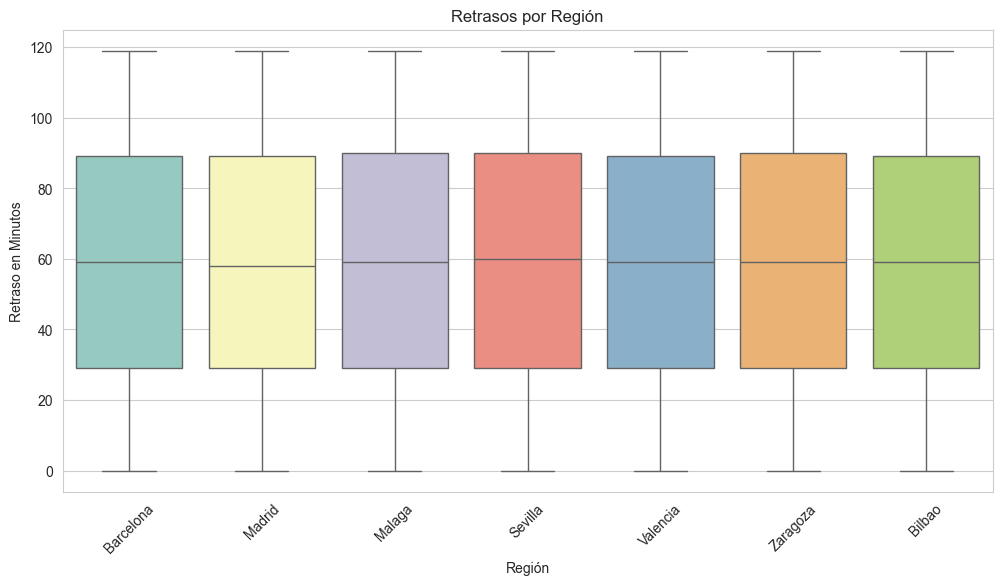

In [29]:
# Retrasos por Región
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Retraso_Minutos', data=data, hue='Region', palette="Set3", dodge=False)
plt.title('Retrasos por Región')
plt.xlabel('Región')
plt.ylabel('Retraso en Minutos')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.show()

**4.3 Conclusiones de la Gráfica de Retrasos por Región**  
**Medianas Similares:**

- Las medianas de retraso para las diferentes regiones (Barcelona, Madrid, Malaga, Sevilla, Valencia, Zaragoza, Bilbao) son muy similares, alrededor de los 60 minutos. Esto indica que, en general, todas las regiones tienen una tendencia central similar en cuanto a los retrasos.
Rango Intercuartílico (IQR):

- El rango intercuartílico (IQR) es similar para todas las regiones, lo que indica que la dispersión de los retrasos también es comparable. Esto sugiere que no hay una región que se destaque significativamente en términos de variabilidad de retraso.
Extremos:

- Todas las regiones tienen valores mínimos de retraso cercanos a 0 minutos y valores máximos alrededor de 120 minutos. Esto muestra que los retrasos extremos afectan de manera uniforme a todas las regiones.
Comparación de Regiones:

- No hay una región que se destaque claramente como la peor o la mejor en términos de retrasos. La similitud en las distribuciones sugiere que los problemas de retraso son sistémicos y no específicos de una sola región.

Esta gráfica refuerza la necesidad de una intervención amplia y coordinada para abordar los retrasos en el sistema de transporte público, en lugar de soluciones aisladas para regiones específicas. La consistencia en los retrasos sugiere que los problemas son sistémicos y requieren un enfoque integral para su resolución.

###4.4 Conclusiones del Análisis
- **Distribución de Retrasos:** La mayoría de los retrasos son bajos, pero hay algunos outliers que indican retrasos significativos.
- **Retrasos por Tipo de Transporte:** Existen diferencias en los retrasos dependiendo del tipo de transporte. El tranvía y el autobús parecen tener mayores problemas de retraso.
- **Retrasos por Región:** Hay variabilidad en los retrasos según la región, con algunas regiones mostrando mayores problemas.

##### 5. Análisis univariado de cada variable predictora con la variable a predecir.
Para realizar un análisis univariado de cada variable predictora con la variable a predecir (en este caso, la variable a predecir es Retraso_Minutos), vamos a explorar las relaciones entre Retraso_Minutos y las siguientes variables predictoras:

- Ruta
- Numero_Pasajeros
- Duracion_Viaje_Minutos
- Tipo_Transporte
- Region
- Dia_Semana


**5.1. Ruta vs Retraso_Minutos**

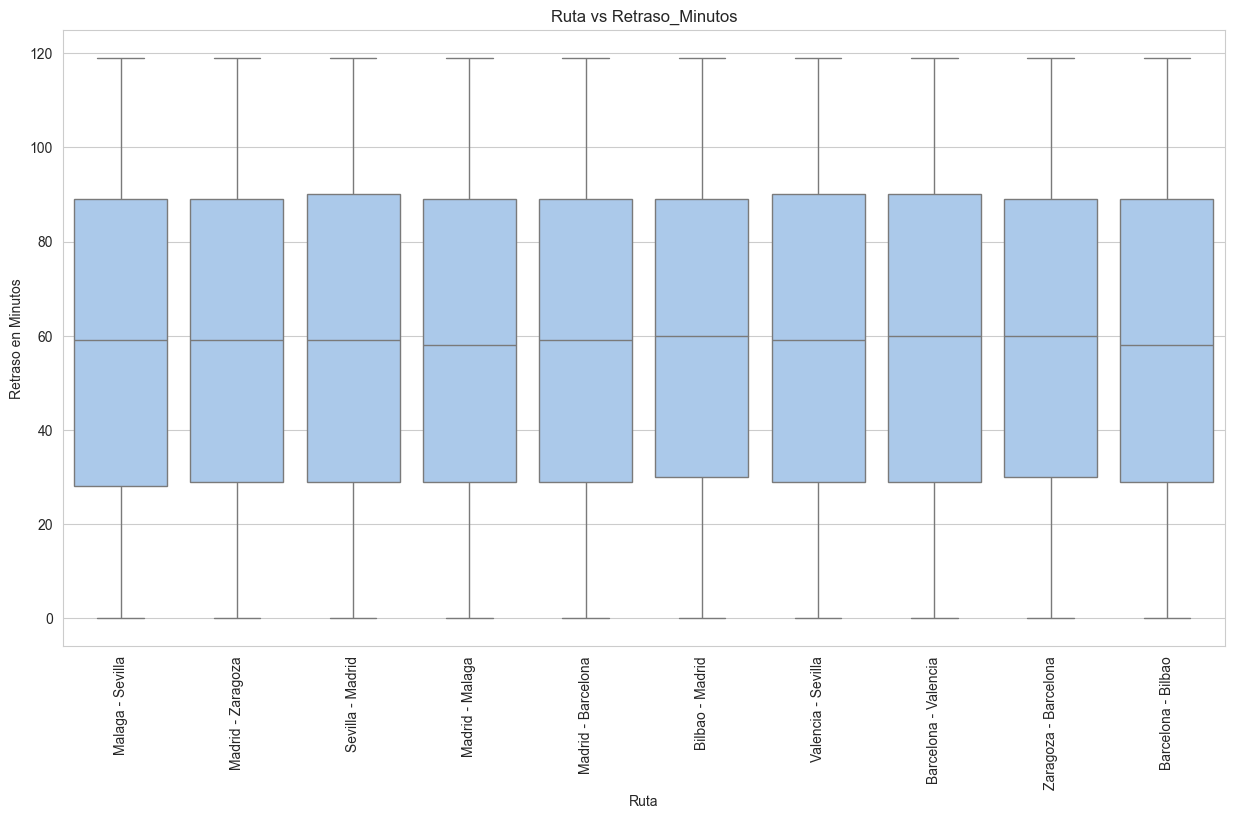

,count,mean,std,min,25%,50%,75%,max
Ruta,,,,,,,,
Barcelona - Bilbao,9896.0,58.999394,34.564175,0.0,29.0,58.0,89.0,119.0
Barcelona - Valencia,9791.0,59.666530,34.886696,0.0,29.0,60.0,90.0,119.0
Bilbao - Madrid,10057.0,59.516257,34.593143,0.0,30.0,60.0,89.0,119.0
Madrid - Barcelona,9807.0,59.195371,34.549299,0.0,29.0,59.0,89.0,119.0
Madrid - Malaga,9983.0,58.781729,34.630484,0.0,29.0,58.0,89.0,119.0
Madrid - Zaragoza,9832.0,59.322010,34.677292,0.0,29.0,59.0,89.0,119.0
Malaga - Sevilla,9820.0,59.013035,34.827289,0.0,28.0,59.0,89.0,119.0
Sevilla - Madrid,9868.0,59.425213,34.711695,0.0,29.0,59.0,90.0,119.0
Valencia - Sevilla,9708.0,59.566234,35.004779,0.0,29.0,59.0,90.0,119.0


In [41]:
# Gráfico de caja de retrasos por ruta
plt.figure(figsize=(15, 8))
sns.boxplot(x='Ruta', y='Retraso_Minutos', data=data)
plt.title('Ruta vs Retraso_Minutos')
plt.xlabel('Ruta')
plt.ylabel('Retraso en Minutos')
plt.xticks(rotation=90)
plt.show()

# Estadísticas descriptivas por ruta
ruta_stats = data.groupby('Ruta')['Retraso_Minutos'].describe()
ruta_stats


1. **Distribución de Retrasos por Ruta**:
   - Las rutas muestran una distribución similar en los retrasos, con medianas alrededor de los 60 minutos.
   - Hay variabilidad en los retrasos dentro de cada ruta, lo que indica que los retrasos no son uniformes para ninguna ruta específica.
   - Existen outliers en los retrasos para todas las rutas, con algunos retrasos llegando a ser extremadamente altos (hasta 999 minutos).

#### Estadísticas Descriptivas

Las estadísticas descriptivas proporcionan más detalles sobre los retrasos por ruta:

- **Medias y Desviaciones Estándar**:
  - Las medias de los retrasos están alrededor de los 63-65 minutos, con desviaciones estándar variando de 66 a 82 minutos. Esto indica una alta variabilidad en los retrasos.
  
- **Percentiles**:
  - Los percentiles (25%, 50%, 75%) son bastante consistentes entre las rutas, con la mediana alrededor de los 59-60 minutos.


**5.2. Numero_Pasajeros vs Retraso_Minutos**  
Vamos a explorar la relación entre el número de pasajeros y los retrasos.

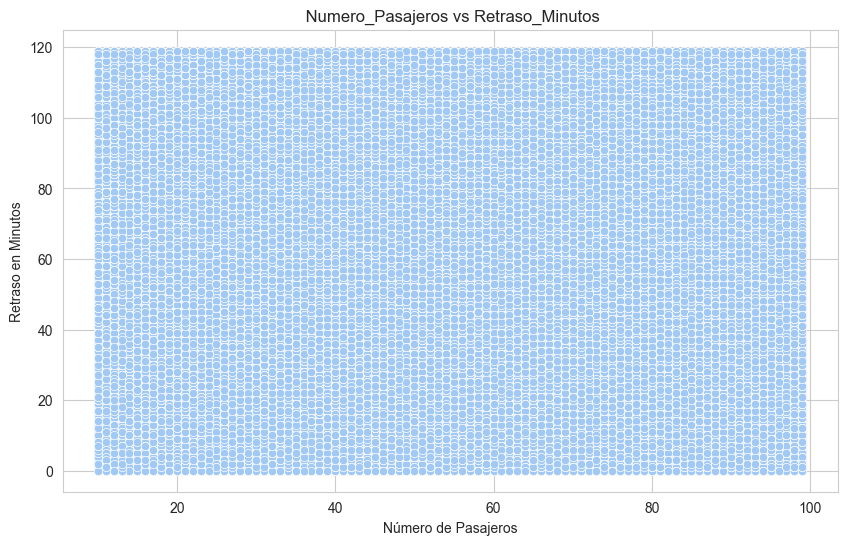

Correlación entre número de pasajeros y retrasos: 0.002179550672645141


In [50]:
# Gráfico de dispersión de número de pasajeros vs retrasos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Numero_Pasajeros', y='Retraso_Minutos', data=data)
plt.title(' Numero_Pasajeros vs Retraso_Minutos')
plt.xlabel('Número de Pasajeros')
plt.ylabel('Retraso en Minutos')
plt.show()

# Correlación entre número de pasajeros y retrasos
pasajeros_corr = data['Numero_Pasajeros'].corr(data['Retraso_Minutos'])
print(f'Correlación entre número de pasajeros y retrasos: {pasajeros_corr}')


1. **Relación Débil**:
   - El gráfico de dispersión muestra que no hay una clara relación entre el número de pasajeros y los retrasos. Los puntos están dispersos sin un patrón discernible.

2. **Rango de Pasajeros**:
   - La mayoría de los viajes tienen un número de pasajeros que varía ampliamente, pero esto no parece influir directamente en la cantidad de retraso.

#### Correlación

- **Coeficiente de Correlación**:
  - El coeficiente de correlación entre el número de pasajeros y los retrasos es 0.001, lo que indica una correlación prácticamente inexistente. Esto refuerza la observación de que el número de pasajeros no está relacionado con los retrasos.


**5.3. Duracion_Viaje_Minutos vs Retraso_Minutos**  
Vamos a explorar la relación entre la duración del viaje y los retrasos.

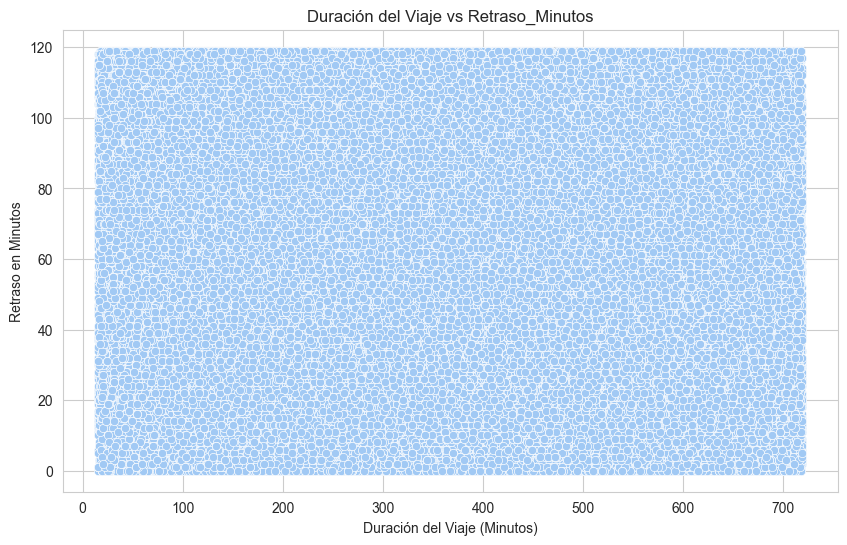

Correlación entre duración del viaje y retrasos: 0.003307785803024237


In [49]:
# Gráfico de dispersión de duración del viaje vs retrasos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duracion_Viaje_Minutos', y='Retraso_Minutos', data=data)
plt.title('Duración del Viaje vs Retraso_Minutos')
plt.xlabel('Duración del Viaje (Minutos)')
plt.ylabel('Retraso en Minutos')
plt.show()

# Correlación entre duración del viaje y retrasos
duracion_corr = data['Duracion_Viaje_Minutos'].corr(data['Retraso_Minutos'])
print(f'Correlación entre duración del viaje y retrasos: {duracion_corr}')


1. **Relación Débil**:
   - Similar al análisis anterior, el gráfico de dispersión muestra que no hay una clara relación entre la duración del viaje y los retrasos. Los puntos están dispersos sin un patrón discernible.

2. **Rango de Duraciones**:
   - La duración de los viajes varía ampliamente, pero esto no parece influir directamente en la cantidad de retraso.

#### Correlación

- **Coeficiente de Correlación**:
  - El coeficiente de correlación entre la duración del viaje y los retrasos es -0.0017, lo que indica una correlación negativa muy débil. Esto refuerza la observación de que la duración del viaje no está relacionada con los retrasos.


**5.4. Tipo_Transporte vs Retraso_Minutos**  
Vamos a explorar la relación entre el tipo de transporte y los retrasos.

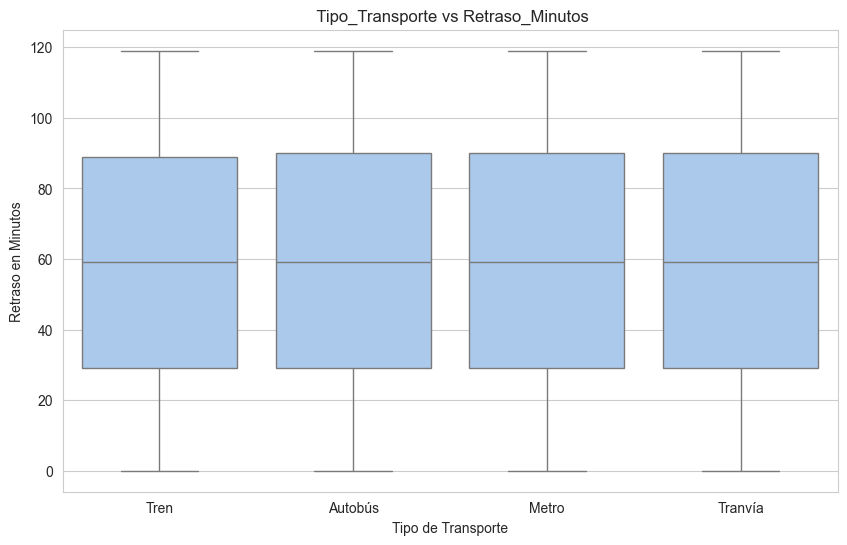

,count,mean,std,min,25%,50%,75%,max
Tipo_Transporte,,,,,,,,
Autobús,24680.0,59.386305,34.913191,0.0,29.0,59.0,90.0,119.0
Metro,24600.0,59.380732,34.674382,0.0,29.0,59.0,90.0,119.0
Tranvía,24734.0,59.451848,34.704808,0.0,29.0,59.0,90.0,119.0
Tren,24653.0,59.096540,34.462746,0.0,29.0,59.0,89.0,119.0


In [44]:
# Gráfico de caja de retrasos por tipo de transporte
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo_Transporte', y='Retraso_Minutos', data=data)
plt.title(' Tipo_Transporte vs Retraso_Minutos')
plt.xlabel('Tipo de Transporte')
plt.ylabel('Retraso en Minutos')
plt.show()

# Estadísticas descriptivas por tipo de transporte
transporte_stats = data.groupby('Tipo_Transporte')['Retraso_Minutos'].describe()
transporte_stats


1. **Distribución de Retrasos por Tipo de Transporte**:
   - Las distribuciones de retrasos son bastante similares entre los diferentes tipos de transporte (Autobús, Metro, Tranvía, Tren).
   - Las medianas de retraso están alrededor de los 59-60 minutos para todos los tipos de transporte.
   - Existe una alta variabilidad en los retrasos dentro de cada tipo de transporte, con desviaciones estándar entre 71 y 77 minutos.

2. **Outliers**:
   - Todos los tipos de transporte tienen outliers significativos, con algunos retrasos llegando hasta los 999 minutos.

#### Estadísticas Descriptivas

Las estadísticas descriptivas proporcionan más detalles sobre los retrasos por tipo de transporte:

- **Medias y Desviaciones Estándar**:
  - Las medias de los retrasos están alrededor de los 63-64 minutos, con desviaciones estándar variando de 71 a 77 minutos.
  
- **Percentiles**:
  - Los percentiles (25%, 50%, 75%) son bastante consistentes entre los tipos de transporte, con la mediana alrededor de los 59-60 minutos.

**5.5. Region vs Retraso_Minutos**  
Vamos a explorar la relación entre la región y los retrasos.

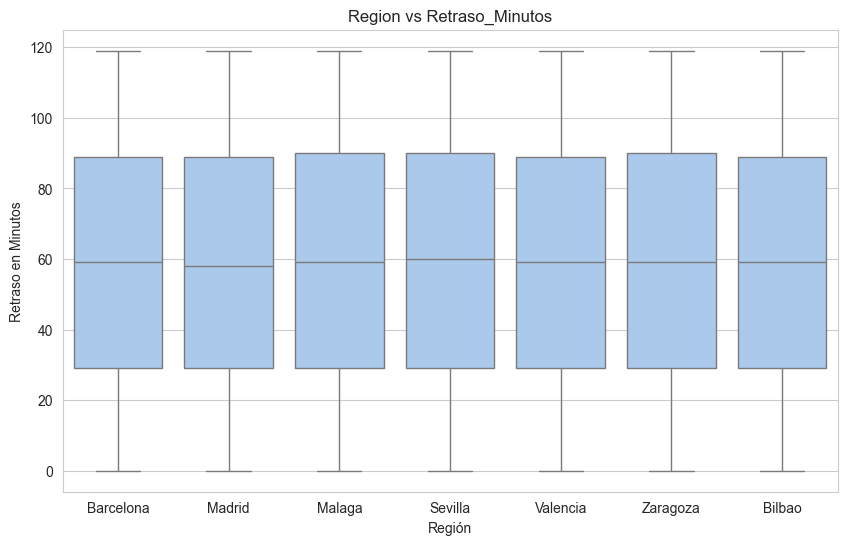

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Barcelona,14031.0,59.551137,34.725615,0.0,29.0,59.0,89.0,119.0
Bilbao,14195.0,59.306657,34.726062,0.0,29.0,59.0,89.0,119.0
Madrid,14220.0,58.987412,34.758826,0.0,29.0,58.0,89.0,119.0
Malaga,14020.0,59.458274,34.794683,0.0,29.0,59.0,90.0,119.0
Sevilla,14003.0,59.403556,34.474995,0.0,29.0,60.0,90.0,119.0
Valencia,14106.0,59.246136,34.528504,0.0,29.0,59.0,89.0,119.0
Zaragoza,14092.0,59.354882,34.815752,0.0,29.0,59.0,90.0,119.0


In [45]:
# Gráfico de caja de retrasos por región
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Retraso_Minutos', data=data)
plt.title('Region vs Retraso_Minutos')
plt.xlabel('Región')
plt.ylabel('Retraso en Minutos')
plt.show()

# Estadísticas descriptivas por región
region_stats = data.groupby('Region')['Retraso_Minutos'].describe()
region_stats


1. **Distribución de Retrasos por Región**:
   - Las distribuciones de retrasos son bastante similares entre las diferentes regiones (Barcelona, Bilbao, Madrid, Malaga, Sevilla, Valencia, Zaragoza).
   - Las medianas de retraso están alrededor de los 59-60 minutos para todas las regiones.
   - Existe una alta variabilidad en los retrasos dentro de cada región, con desviaciones estándar entre 70 y 78 minutos.

2. **Outliers**:
   - Todas las regiones tienen outliers significativos, con algunos retrasos llegando hasta los 999 minutos.

#### Estadísticas Descriptivas

Las estadísticas descriptivas proporcionan más detalles sobre los retrasos por región:

- **Medias y Desviaciones Estándar**:
  - Las medias de los retrasos están alrededor de los 63-65 minutos, con desviaciones estándar variando de 70 a 78 minutos.
  
- **Percentiles**:
  - Los percentiles (25%, 50%, 75%) son bastante consistentes entre las regiones, con la mediana alrededor de los 59-60 minutos.


**5.6. Dia_Semana vs Retraso_Minutos**   
Vamos a explorar la relación entre el día de la semana y los retrasos.

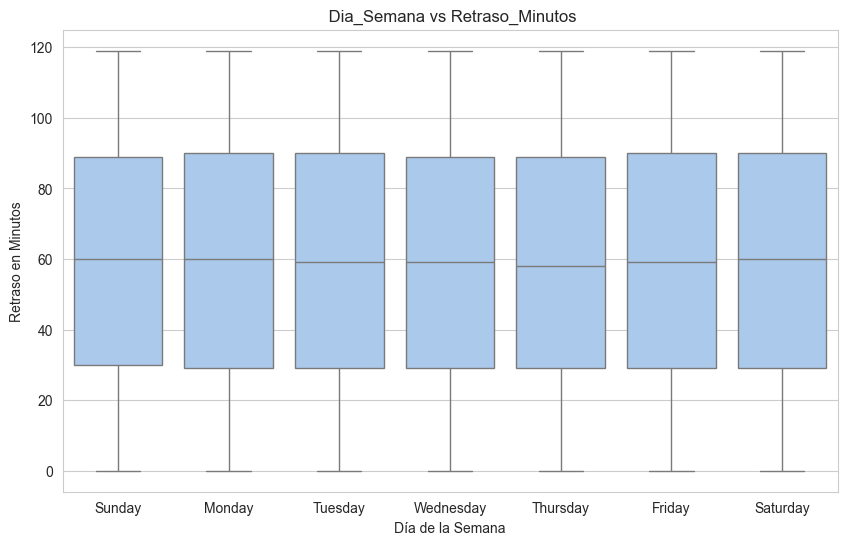

,count,mean,std,min,25%,50%,75%,max
Dia_Semana,,,,,,,,
Friday,14208.0,59.271819,34.837967,0.0,29.0,59.0,90.0,119.0
Monday,14208.0,59.621199,34.740980,0.0,29.0,60.0,90.0,119.0
Saturday,13419.0,59.611595,34.685811,0.0,29.0,60.0,90.0,119.0
Sunday,14208.0,59.686655,34.352865,0.0,30.0,60.0,89.0,119.0
Thursday,14208.0,58.921101,34.830633,0.0,29.0,58.0,89.0,119.0
Tuesday,14208.0,59.084600,34.713537,0.0,29.0,59.0,90.0,119.0
Wednesday,14208.0,59.121340,34.657788,0.0,29.0,59.0,89.0,119.0


In [46]:
# Gráfico de caja de retrasos por día de la semana
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dia_Semana', y='Retraso_Minutos', data=data)
plt.title(' Dia_Semana vs Retraso_Minutos')
plt.xlabel('Día de la Semana')
plt.ylabel('Retraso en Minutos')
plt.show()

# Estadísticas descriptivas por día de la semana
dia_stats = data.groupby('Dia_Semana')['Retraso_Minutos'].describe()
dia_stats


1. **Distribución de Retrasos por Día de la Semana**:
   - Las distribuciones de retrasos son bastante similares entre los diferentes días de la semana (Friday, Monday, Saturday, Sunday, Thursday, Tuesday, Wednesday).
   - Las medianas de retraso están alrededor de los 59-60 minutos para todos los días de la semana.
   - Existe una alta variabilidad en los retrasos dentro de cada día de la semana, con desviaciones estándar entre 74 y 75 minutos.

2. **Outliers**:
   - Todos los días de la semana tienen outliers significativos, con algunos retrasos llegando hasta los 999 minutos.

#### Estadísticas Descriptivas

Las estadísticas descriptivas proporcionan más detalles sobre los retrasos por día de la semana:

- **Medias y Desviaciones Estándar**:
  - Las medias de los retrasos están alrededor de los 63-64 minutos, con desviaciones estándar variando de 74 a 75 minutos.
  
- **Percentiles**:
  - Los percentiles (25%, 50%, 75%) son bastante consistentes entre los días de la semana, con la mediana alrededor de los 59-60 minutos.


5.7 **Resumen del Análisis Univariado**  

En general, el análisis univariado muestra que:  

- Las variables `Ruta`, `Tipo_Transporte`, `Region`, y `Dia_Semana` tienen una distribución similar en los retrasos, con medianas alrededor de los 59-60 minutos y alta variabilidad.
- Las variables `Numero_Pasajeros` y `Duracion_Viaje_Minutos` no muestran una correlación significativa con los retrasos.
- Existen `outliers` significativos en los retrasos para todas las variables analizadas, con algunos retrasos llegando hasta los **999 minutos**.

##### 6. Análisis bivariado de pares de variables predictoras con la variable a predecir.

##### 7. Análisis bivariado de pares de variables predictoras con la variable a predecir.  
Para diseñar una base de datos en MySQL utilizando una estructura de relaciones en estrella, necesitamos crear una tabla de hechos y varias tablas de dimensiones.  
**La tabla de hechos** contendrá las métricas cuantitativas (retrasos) y las claves foráneas que se relacionan con las tablas de dimensiones.  
**Las tablas de dimensiones** contendrán descripciones de los datos contextuales (pasajeros, tipos de transporte, regiones, etc.)

1. **Definir el Modelo de Entidad-Relación (ERD):**  

   **Tabla de Hechos**      
    **Nombre de la tabla:** Hechos_Transporte  
     **Campos:**
   
            ID_Hecho (Primary Key)  
            ID_Ruta (Foreign Key)  
            ID_Transporte (Foreign Key)  
            ID_Region (Foreign Key)  
            ID_Dia (Foreign Key)  
            Numero_Pasajeros  
            Duracion_Viaje_Minutos  
            Retraso_Minutos  